# NLP Project - GitHub ReadMe Files Programming Language

## What are the most common words in READMEs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('nutrition_repos_clean_stemmed_lemmatize.csv')
df

,language,readme_contents,clean,clean_stemmed,clean_lemmatized
0,Java,# Nutrition\n\nNutrition is a highly configura...,nutrition\n\nnutrition is a highly configurabl...,nutrit nutrit highli configur mod enabl creati...,nutrition nutrition highly configurable mod en...
1,Java,\n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP \n\n仓库地址: htt...,app \n\n httpsgithubcomwangtianruinutritionmas...,app httpsgithubcomwangtianruinutritionmast api...,app httpsgithubcomwangtianruinutritionmaster a...
2,JavaScript,Nutrition Label jQuery Plugin by Nutritionix\r...,nutrition label jquery plugin by nutritionix\r...,nutrit label jqueri plugin nutritionix npmhttp...,nutrition label jquery plugin nutritionix npmh...
3,other,\n# off-nutrition-table-extractor\nThis reposi...,offnutritiontableextractor\nthis repository is...,offnutritiontableextractor thi repositori accu...,offnutritiontableextractor repository accumula...
4,Python,"﻿# wger\n<img src=""https://raw.githubuserconte...",wger\nimg srchttpsrawgithubusercontentcomwgerp...,wger img srchttpsrawgithubusercontentcomwgerpr...,wger img srchttpsrawgithubusercontentcomwgerpr...
...,...,...,...,...,...
112,other,= NutritionLabelPlugin\nNutrition label genera...,nutritionlabelplugin\nnutrition label generati...,nutritionlabelplugin nutrit label gener rail 3...,nutritionlabelplugin nutrition label generatio...
113,other,# The-Nutrition-Coach\n\n## Inspiration\nGrowi...,thenutritioncoach\n\n inspiration\ngrowing up ...,thenutritioncoach inspir grow might heard term...,thenutritioncoach inspiration growing might he...
114,other,Here is the basic gist of this application. Th...,here is the basic gist of this application thi...,basic gist thi applic thi test ground build ge...,basic gist application testing ground build ge...
115,JavaScript,# csci-3308-Project-GroupAwesome\n\nProject Na...,csci3308projectgroupawesome\n\nproject name fe...,csci3308projectgroupawesom project name feedme...,csci3308projectgroupawesome project name feedm...


In [3]:
# how many languages are there
len(df.language.unique())

4

In [4]:
# what is the frequency of the programming language
df.language.value_counts()

other         52
JavaScript    34
Python        19
Java          12
Name: language, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          117 non-null    object
 1   readme_contents   117 non-null    object
 2   clean             117 non-null    object
 3   clean_stemmed     117 non-null    object
 4   clean_lemmatized  117 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [6]:
df.isna().sum()

language            0
readme_contents     0
clean               0
clean_stemmed       0
clean_lemmatized    0
dtype: int64

In [7]:
asdfasdfasdf

NameError: name 'asdfasdfasdf' is not defined

In [ ]:
# join rows of string together
words = ' '.join(df.clean_lemmatized)
words

In [ ]:
# split string by space to isolate words
words_list = words.split()
words_list

In [ ]:
# create dataframe of word count
word_count = pd.Series(words_list).value_counts().reset_index()
word_count.columns=['word','count']

# drop non-words
word_count = word_count.drop([0,2,5,12])

In [ ]:
# what is the total number of words
word_amount = len(word_count)
word_amount

In [ ]:
# Add column for percent of all words
word_count['percent'] = round(word_count['count'] / word_amount, 4)
word_count.head(10)

In [ ]:
word_count_top_10 = word_count.head(10)
word_count_top_10

In [ ]:
word_count_top_10_percent = word_count.sort_values(by='percent', ascending=False).head(10)
word_count_top_10_percent

## Top 10 Most Common Words
- food, nutrition,user, data, gram, recipe, use, app, database, file

In [ ]:
# plot bar graph for top 10 words
sns.barplot(data=word_count_top_10, x='count', y='word')
plt.title('Top 10 Most Common words')
plt.show()

In [ ]:
# plot bar graph for top 10 words by percent
sns.barplot(data=word_count_top_10_percent, x='percent', y='word')
plt.title('Top 10 Most Common words by Percent')
plt.show()

In [ ]:
from wordcloud import WordCloud

# create word cloud image
img = WordCloud(background_color='white').generate(words)
# axis aren't very useful for a word cloud
plt.axis('off')
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
plt.show()

In [ ]:
# bigrams = nltk.ngrams(words_list(), 2)
# list(bigrams)

In [ ]:
# top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
#                       .value_counts()
#                       .head(20))

# top_20_ham_bigrams.head()

In [ ]:
# top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

# plt.title('20 Most frequently occuring ham bigrams')
# plt.ylabel('Bigram')
# plt.xlabel('# Occurances')

# # make the labels pretty
# ticks, _ = plt.yticks()
# labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)

In [ ]:
# def get_readme_length(string):
#     length = len(string.split())
#     return length

In [ ]:
# nut_rep["cleaned_stemmed_length"] = nut_rep["clean_stemmed"].apply(get_readme_length)
# nut_rep["cleaned_lemmed_length"] = nut_rep["clean_lemmatized"].apply(get_readme_length)

In [ ]:
# nut_rep.groupby("language")["cleaned_stemmed_length"].agg(["mean", "median"])
# nut_rep.groupby("language")["cleaned_lemmed_length"].agg(["mean", "median"])

## Pre-Process

In [ ]:
df.head()

### Split

In [ ]:
from split_get_scale import SplitGetScale

sgs = SplitGetScale()
train, test = sgs.split(df)

In [ ]:
train.shape, test.shape

### Create X and y versions of TFIDF Vectorized Data

In [ ]:
# Get X and y versions of tfidf vectorized data
(X_train_stemmed, y_train_stemmed), (X_test_stemmed, y_test_stemmed) = sgs.get_Xy(train, test, cols_train="clean_stemmed")
(X_train_lemmed, y_train_lemmed), (X_test_lemmed, y_test_lemmed) = sgs.get_Xy(train, test, cols_train="clean_lemmatized")

## Modeling

In [ ]:
# create baseline from mode of language
df.language.mode()

In [ ]:
# create baseline from mode of language
baseline = df.language == 'other'
baseline.mean()

## Baseline is 44%

## Model 1: Logistics Regression with Lemmatized Data

In [ ]:
# # create dataframe for y_train
# train_lemmed = pd.DataFrame(dict(actual=y_train_lemmed))
# train_stemmed = pd.DataFrame(dict(actual=y_train_stemmed))
# train_lemmed.head()

In [ ]:
y_train_lemmed

In [ ]:
adsfadsf

In [ ]:
y_train_lemmed = pd.DataFrame(dict(actual=y_train_lemmed))
y_test_lemmed = pd.DataFrame(dict(actual=y_test_lemmed))
y_train_lemmed

In [ ]:
y_train_stemmed = pd.DataFrame(dict(actual=y_train_stemmed))
y_test_stemmed = pd.DataFrame(dict(actual=y_test_stemmed))
y_train_stemmed

In [ ]:
# create logistics regesson object by fitting to X_trian and y_train
lm_lemm = LogisticRegression().fit(X_train_lemmed, y_train_lemmed)
lm_stemm = LogisticRegression().fit(X_train_stemmed, y_train_stemmed)

In [ ]:
# make prediction on train and test for Lemmatize data
y_train_lemmed['predicted'] = lm_lemm.predict(X_train_lemmed)
y_test_lemmed['predicted'] = lm_lemm.predict(X_test_lemmed)
y_train_lemmed.head()

In [ ]:
# make prediction on train and test for stemm data
y_train_stemmed['predicted'] = lm_stemm.predict(X_train_stemmed)
y_test_stemmed['predicted'] = lm_stemm.predict(X_test_stemmed)
y_train_stemmed.head()

In [ ]:
print('Lemmatized Train Accuracy: {:.2%}'.format(accuracy_score(y_train_lemmed.actual, y_train_lemmed.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train_lemmed.predicted, y_train_lemmed.actual))
print('---')
print(classification_report(y_train_lemmed.actual, y_train_lemmed.predicted))


### 83% Accuracy

In [ ]:
print('Stemm Train Accuracy: {:.2%}'.format(accuracy_score(y_train_stemmed.actual, y_train_stemmed.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train_stemmed.predicted, y_train_stemmed.actual))
print('---')
print(classification_report(y_train_stemmed.actual, y_train_stemmed.predicted))

### 83% Accuracy

In [ ]:
print('Lemmatized Test Accuracy: {:.2%}'.format(accuracy_score(y_test_lemmed.actual, y_test_lemmed.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_test_lemmed.predicted, y_test_lemmed.actual))
print('---')
print(classification_report(y_test_lemmed.actual, y_test_lemmed.predicted))

### 50% Accuracy

In [ ]:
print('Stemm Test Accuracy: {:.2%}'.format(accuracy_score(y_test_stemmed.actual, y_test_stemmed.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_test_stemmed.predicted, y_test_stemmed.actual))
print('---')
print(classification_report(y_test_stemmed.actual, y_test_stemmed.predicted))

### 50% Accuracy

In [ ]:
print(f"TRAIN\nLogistics Regression Stemmed Accuracy: {round(accuracy_score(y_train_stemmed.actual, y_train_stemmed.predicted), 2)}")
print(f"Logistics Regression Lemmed Accuracy: {round(accuracy_score(y_train_lemmed.actual, y_train_lemmed.predicted), 2)}")


print(f"\nTEST\nLogistics Regression Stemmed Accuracy Test: {round(accuracy_score(y_test_stemmed.actual, y_test_stemmed.predicted), 2)}")
print(f"Logistics Regression Lemmed Accuracy Test: {round(accuracy_score(y_test_lemmed.actual, y_test_lemmed.predicted), 2)}")

## Test Modules

### Modeling

In [ ]:
import modeling

In [ ]:
y_train_stemmed, y_test_stemmed = modeling.lr_stemm(y_train_stemmed, y_test_stemmed, X_train_stemmed, X_test_stemmed)

In [ ]:
y_train_lemmed, y_test_lemmed = modeling.lr_lemm(y_train_lemmed, y_test_lemmed, X_train_lemmed, X_test_lemmed)

In [ ]:
modeling.lr_print(y_train_lemmed, y_test_lemmed, y_train_stemmed, y_test_stemmed)

In [19]:
df.head()

,language,readme_contents,clean,clean_stemmed,clean_lemmatized
0,Java,# Nutrition\n\nNutrition is a highly configura...,nutrition\n\nnutrition is a highly configurabl...,nutrit nutrit highli configur mod enabl creati...,nutrition nutrition highly configurable mod en...
1,Java,\n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP \n\n仓库地址: htt...,app \n\n httpsgithubcomwangtianruinutritionmas...,app httpsgithubcomwangtianruinutritionmast api...,app httpsgithubcomwangtianruinutritionmaster a...
2,JavaScript,Nutrition Label jQuery Plugin by Nutritionix\r...,nutrition label jquery plugin by nutritionix\r...,nutrit label jqueri plugin nutritionix npmhttp...,nutrition label jquery plugin nutritionix npmh...
3,other,\n# off-nutrition-table-extractor\nThis reposi...,offnutritiontableextractor\nthis repository is...,offnutritiontableextractor thi repositori accu...,offnutritiontableextractor repository accumula...
4,Python,"﻿# wger\n<img src=""https://raw.githubuserconte...",wger\nimg srchttpsrawgithubusercontentcomwgerp...,wger img srchttpsrawgithubusercontentcomwgerpr...,wger img srchttpsrawgithubusercontentcomwgerpr...


### viz

In [71]:
def stemm_top_ten_words(df):
    '''
    '''
    
    # join rows of string together
    stemm_words = ' '.join(df.clean_stemmed)

    # split string by space to isolate words
    stemm_words_list = stemm_words.split()

    # create dataframe of word count
    stemm_word_count = pd.Series(stemm_words_list).value_counts().reset_index()
    stemm_word_count.columns=['word','count']

    # drop non-words
#     stemm_word_count = word_count.drop([0,2,5,12])

    stemm_top_10_words = stemm_word_count.head(10)

    return stemm_words, stemm_top_10_words

In [74]:
stemm_words, stemm_top_10_words = stemm_top_ten_words(df)

In [61]:
def lemm_top_ten_words(df):
    '''
    '''
    
    # join rows of string together
    lemm_words = ' '.join(df.clean_lemmatized)

    # split string by space to isolate words
    lemm_words_list = lemm_words.split()

    # create dataframe of word count
    lemm_word_count = pd.Series(lemm_words_list).value_counts().reset_index()
    lemm_word_count.columns=['word','count']

    # drop non-words
#     word_count = word_count.drop([0,2,5,12])

    lemm_top_10_words = lemm_word_count.head(10)
    
    return lemm_top_10_words, lemm_words

In [75]:
lemm_top_10_words, lemm_words = lemm_top_ten_words(df)

In [41]:
from wordcloud import WordCloud

In [76]:
def stemm_top_ten(stemm_top_10_words):
    '''
    '''
    # plot bar graph for top 10 words
    sns.barplot(data=stemm_top_10_words, x='count', y='word')
    plt.title('Top 10 Most Common words')
    plt.show()

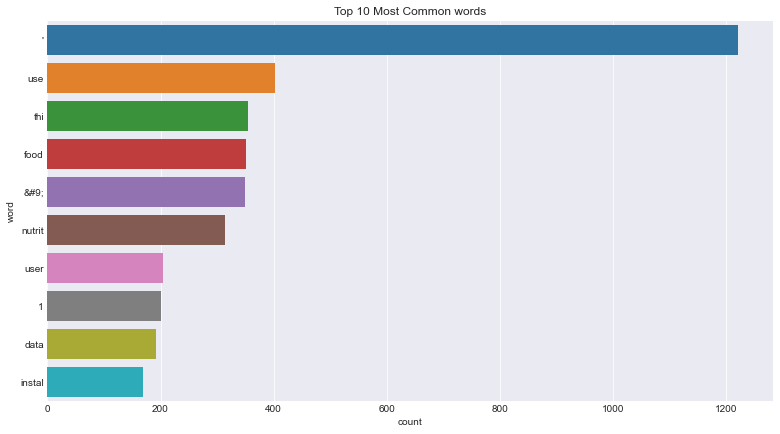

In [77]:
stemm_top_ten(stemm_top_10_words)

In [78]:
def lemm_top_ten(lemm_top_10_words):
    '''
    '''
    # plot bar graph for top 10 words
    sns.barplot(data=lemm_top_10_words, x='count', y='word')
    plt.title('Top 10 Most Common words')
    plt.show()

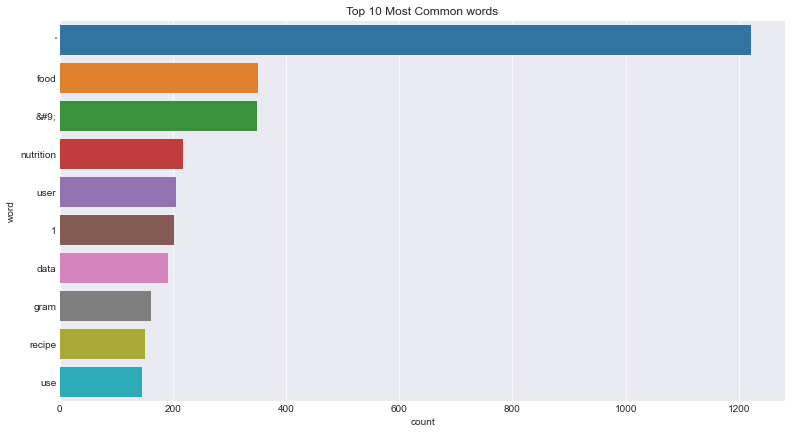

In [79]:
lemm_top_ten(lemm_top_10_words)

In [80]:
from wordcloud import WordCloud

In [81]:
def stemm_wordcloud(stemm_words):
    '''
    '''
    
    # create word cloud image
    img = WordCloud(background_color='white').generate(stemm_words)
    # axis aren't very useful for a word cloud
    plt.axis('off')
    # WordCloud() produces an image object, which can be displayed with plt.imshow
    plt.imshow(img)
    plt.show()

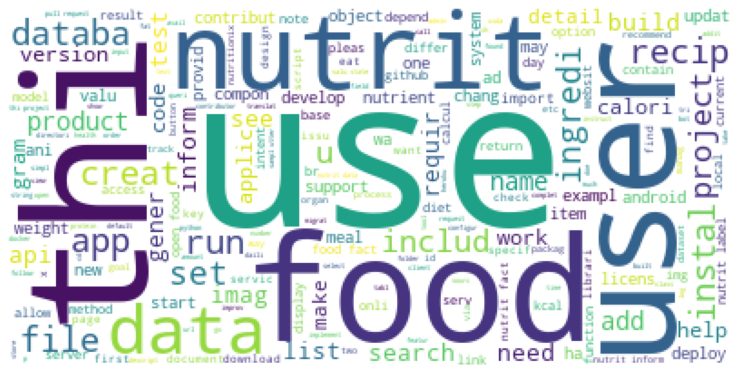

In [82]:
stemm_wordcloud(stemm_words)

In [84]:
def lemm_wordcloud(lemm_words):
    '''
    '''
    # create word cloud image
    img = WordCloud(background_color='white').generate(lemm_words)
    # axis aren't very useful for a word cloud
    plt.axis('off')
    # WordCloud() produces an image object, which can be displayed with plt.imshow
    plt.imshow(img)
    plt.show()

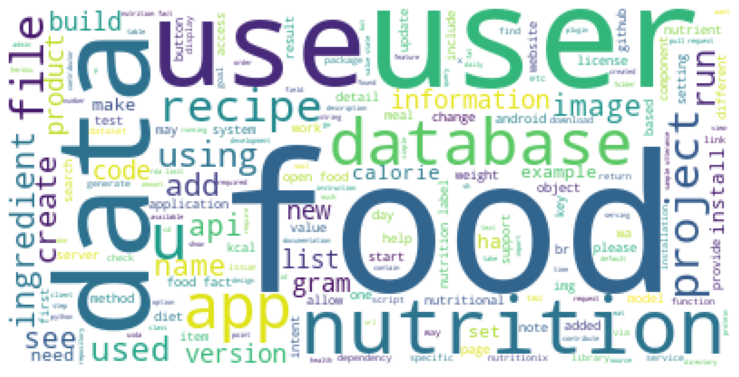

In [85]:
lemm_wordcloud(lemm_words)